# Logistic Regression on Image Classification — Project Step

This experiment is part of a longer journey toward building a complete image-classification system from scratch. I started with **linear and logistic regression** to understand baseline performance on my dataset before moving to more advanced models.

To train the model, all images were **resized to 64×64×3** and flattened into feature vectors. Logistic regression was then implemented manually (without deep-learning frameworks) using gradient descent, following the mathematical formulation learned in the course.

The model reached a test accuracy of **70ss%** , which provided a simple but useful baseline for understanding how well linear models can separate the classes in pixel space.

Even though the performance is limited, this step helped me validate the data pipeline, confirm that the labels and preprocessing work correctly, and prepare for more complex models in the upcoming stages of the project.


In [1]:
import numpy as np
import time
import h5py
# Start timing
start_time = time.time()


# Loading Training and Testing Data

**Output**: Y_train, Y_test - dictionaries with image names as keys, binary labels as values


In [2]:
with h5py.File("../EIDSeg_Dataset/cache/eidseg_64x64_binary_any.h5", "r") as f:
    X_train_org = f["X_train"][:]
    Y_train_org = f["Y_train"][:]
    X_test_org  = f["X_test"][:]
    Y_test_org  = f["Y_test"][:]


In [3]:
m_train = X_train_org.shape[0]
m_test = X_test_org.shape[0]
num_px =X_train_org.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(Y_train_org.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(Y_test_org.shape))

Number of training examples: m_train = 2612
Number of testing examples: m_test = 327
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (2612, 64, 64, 3)
train_set_y shape: (1, 2612)
test_set_x shape: (327, 64, 64, 3)
test_set_y shape: (1, 327)


In [4]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_64x64_binary_any_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)


In [5]:
print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x flatten shape: (12288, 2612)
train_set_y shape: (1, 2612)
test_set_x flatten shape: (12288, 327)
test_set_y shape: (1, 327)


y = [1]


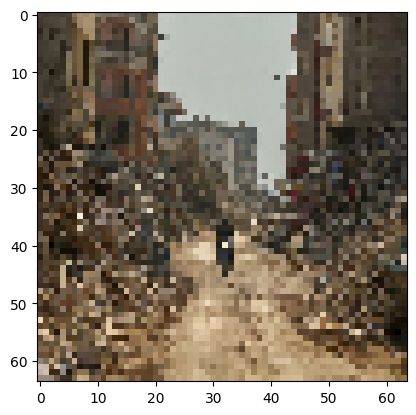

In [6]:
import matplotlib.pyplot as plt
# Example of a picture
index = 4
plt.imshow(X_train_org[index])
print ("y = " + str(Y_train_org[:, index]))


In [7]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    w = np.zeros((dim,1))
    b = 0.0

    return w, b

def sigmoid(z):
    s=1/(1+np.exp(-z))    
    return s

In [8]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    """
    
    m = X.shape[1]

    A= sigmoid(np.dot(w.T,X)+b)
    cost= Y*np.log(A)+(1-Y)*np.log(1-A)
    cost=np.sum(cost)
    cost/=-m
    dw=np.dot(X,(A-Y).T)
    db=np.sum(A-Y)
    dw/=m
    db/=m
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [9]:
import copy

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate (w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w -= learning_rate*dw
        b -= learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [10]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        
    
    return Y_prediction

In [11]:

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    w=np.zeros((X_train.shape[0],1))
    b=0.0
    params, grads, costs = optimize(w ,b ,X_train ,Y_train ,num_iterations ,learning_rate ,print_cost)
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train= predict(w,b,X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [12]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.688823
Cost after iteration 200: 0.684718
Cost after iteration 300: 0.680820
Cost after iteration 400: 0.677118
Cost after iteration 500: 0.673604
Cost after iteration 600: 0.670267
Cost after iteration 700: 0.667098
Cost after iteration 800: 0.664088
Cost after iteration 900: 0.661230
Cost after iteration 1000: 0.658515
Cost after iteration 1100: 0.655936
Cost after iteration 1200: 0.653486
Cost after iteration 1300: 0.651159
Cost after iteration 1400: 0.648948
Cost after iteration 1500: 0.646846
Cost after iteration 1600: 0.644849
Cost after iteration 1700: 0.642951
Cost after iteration 1800: 0.641147
Cost after iteration 1900: 0.639432
train accuracy: 70.71209800918837 %
test accuracy: 74.00611620795107 %


In [13]:
# End timing
end_time = time.time()
elapsed = end_time - start_time

# Convert to minutes and seconds
minutes = int(elapsed // 60)
seconds = elapsed % 60

print(f"Time taken: {minutes} minutes and {seconds:.2f} seconds")

Time taken: 4 minutes and 30.63 seconds


In [16]:
import sys

sys.path.append("../src")
from eval_utils import *
from visualization import *

=== Model Evaluation Report ===
B                   : 0.3238
Learning Rate       : 0.0010


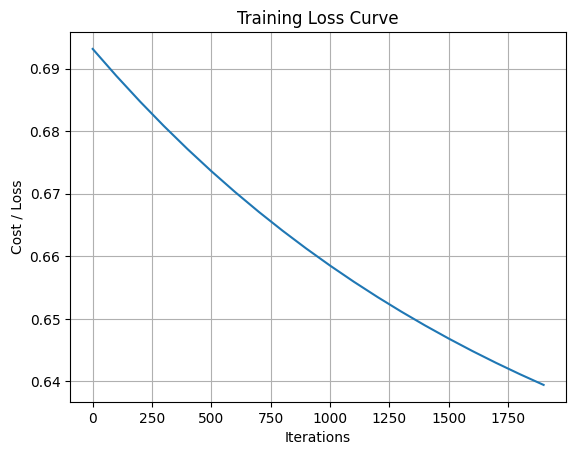

In [21]:
print_report(logistic_regression_model)
plot_costs(logistic_regression_model.get("costs", []))